In [2]:
from tensorflow import keras
import numpy as np


(Xtrain,ytrain),(Xtest,ytest) = keras.datasets.mnist.load_data()
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
# create the CNN model
cnn_model = keras.models.Sequential() # empty framework
# Convolutinal layer 1
cnn_model.add(keras.layers.Conv2D(10,3,activation='relu',input_shape=(28,28,1)))
# maxpooling -1
cnn_model.add(keras.layers.MaxPool2D((2,2)))

# Convolutinal layer 2
cnn_model.add(keras.layers.Conv2D(50,3,activation='relu'))
# maxpooling -2
cnn_model.add(keras.layers.MaxPool2D((2,2)))

# feed forwards network
cnn_model.add(keras.layers.Flatten()) # input layer
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL1
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL2
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL3
cnn_model.add(keras.layers.Dense(len(np.unique(ytrain)))) # Output layer

# optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
cnn_model.compile(optimizer='sgd',loss = loss,metrics=['accuracy'])
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 50)        4550      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 50)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1250)              0         
                                                                 
 dense (Dense)               (None, 200)               2

In [4]:
# train the cnn along with the validation data
history = cnn_model.fit(Xtrain,ytrain,epochs=20,validation_data=(Xtest,ytest))

Epoch 1/20
1875/1875 [==============================] - 43s 22ms/step - loss: 2.3372 - accuracy: 0.2010 - val_loss: 1.1654 - val_accuracy: 0.6679
Epoch 2/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.4870 - accuracy: 0.8478 - val_loss: 0.2727 - val_accuracy: 0.9145
Epoch 3/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2488 - accuracy: 0.9201 - val_loss: 0.2213 - val_accuracy: 0.9301
Epoch 4/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1940 - accuracy: 0.9377 - val_loss: 0.1609 - val_accuracy: 0.9484
Epoch 5/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1705 - accuracy: 0.9455 - val_loss: 0.1539 - val_accuracy: 0.9507
Epoch 6/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1443 - accuracy: 0.9541 - val_loss: 0.1374 - val_accuracy: 0.9560
Epoch 7/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1353 - accuracy: 0.9567 - val_loss: 0.1295 -

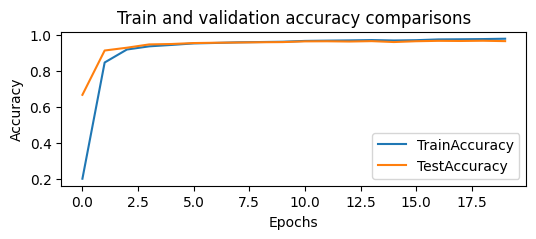

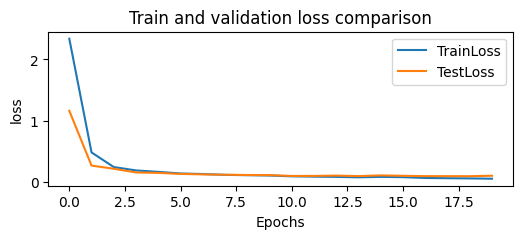

In [5]:
import matplotlib.pyplot as plt

plt.figure(1,(6,2))
plt.plot(history.epoch,history.history['accuracy'],label='TrainAccuracy')
plt.plot(history.epoch,history.history['val_accuracy'],label='TestAccuracy')
plt.title('Train and validation accuracy comparisons')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(2,(6,2))
plt.plot(history.epoch,history.history['loss'],label='TrainLoss')
plt.plot(history.epoch,history.history['val_loss'],label='TestLoss')
plt.title('Train and validation loss comparison')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()